# Data Preprocessing, Word Cloud Generation, Frequency Table And Bar Graph

### 1.Data Preprocessing: 
#### A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. It provides a quick overview of the most prominent terms in the dataset. 

### 2.Word Cloud Generation: 
#### A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. It provides a quick overview of the most prominent terms in the dataset

### 3.Frequency Table
#### A Frequency Table is a tabular summary showing how often different values occur in a dataset.

### 4.Bar Graph
#### A Bar Graph is a visual representation of this data, where each category is represented by a bar whose height corresponds to its frequency.

# 1. Data Preprocessing:

## Imported required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

## Downloaded NLTK resources

In [23]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loaded The Dataset And Printed

In [24]:
data = pd.read_csv("reviews.csv")

print(data.head())

                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app u

# Implementing data preprocessing techniques on the data

## Lowercasing

In [25]:
data['content'] = data['content'].str.lower()

## Removed links

In [26]:
data['content'] = data['content'].astype(str).apply(lambda x: re.sub(r'http\S+', '', x))

## Removed next lines (\n)

In [27]:
data['content'] = data['content'].str.replace('\n', '')

## Removed the words that contains numbers

In [28]:
data['content'] = data['content'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

## Removed the extra spaces

In [29]:
data['content'] = data['content'].apply(lambda x: ' '.join(x.split()))

## Removed the special characters

In [30]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]' 
    return re.sub(pattern, '', text)

data['content'] = data['content'].apply(remove_special_characters)

## Removed of Stop words

In [31]:
from gensim.parsing.preprocessing import remove_stopwords

data['content'] = data['content'].apply(remove_stopwords)

## Stemming

In [32]:
porter = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['content'] = data['content'].apply(stem_text)

## Lemmatization

In [33]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

data['content'] = data['content'].apply(lemmatize_text)

# Printed the data after implementing data preprocessing techniques

In [34]:
print(data['content'])

0        recur task day need todolist remind buzz time ...
1        instead shop download anydo wide set day sched...
2        blue app ask updat acct email task list lost t...
3        terribl updat app perfect plan certain task co...
4        app deceivingli terribl nice design featur lik...
                               ...                        
16782                                            excel app
16783    love easi use life organ love way photo locat ...
16784                    love plan check app everyday love
16785                                         exactli need
16786                                                 good
Name: content, Length: 16787, dtype: object


# 2.Word Cloud Generation

## Step 1: Import the necessary library for generating word clouds.

In [35]:
from wordcloud import WordCloud

## Step 2: Concatenate all the preprocessed text data into a single string.

In [36]:
all_text = ' '.join(data['content'])

## Step 3: Generate the word cloud.

In [37]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(all_text)

## Step 4: Display the word cloud.

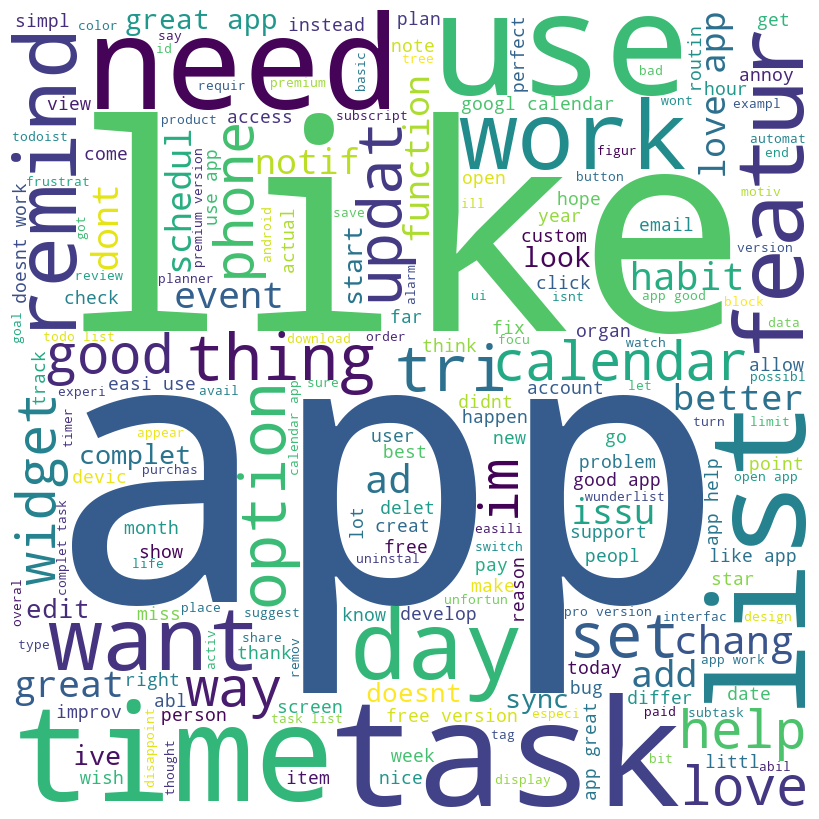

In [38]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# 3.Frequency Table

## Step 1: Tokenize the preprocessed text data into individual words.

In [42]:
from collections import Counter

words = all_text.split()

## Step 2: Generate the frequency table using the Counter class.

In [43]:
word_freq = Counter(words)

## Step 3: Convert the frequency table into a pandas DataFrame for better manipulation and visualization.

In [44]:
import pandas as pd

# Convert the frequency table into a pandas DataFrame
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

## Step 4: Display the top words and their frequencies.

In [45]:
print(freq_df.head(10))

         Word  Frequency
9         app      16238
1        task       6220
69        use       4100
95       like       4092
7        time       4061
26       work       3696
60       list       3363
271  calendar       3184
2         day       3067
94     featur       2642


# 4.Bar Graph

## Step 1: Import the necessary libraries.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Plot the bar graph using seaborn or matplotlib.

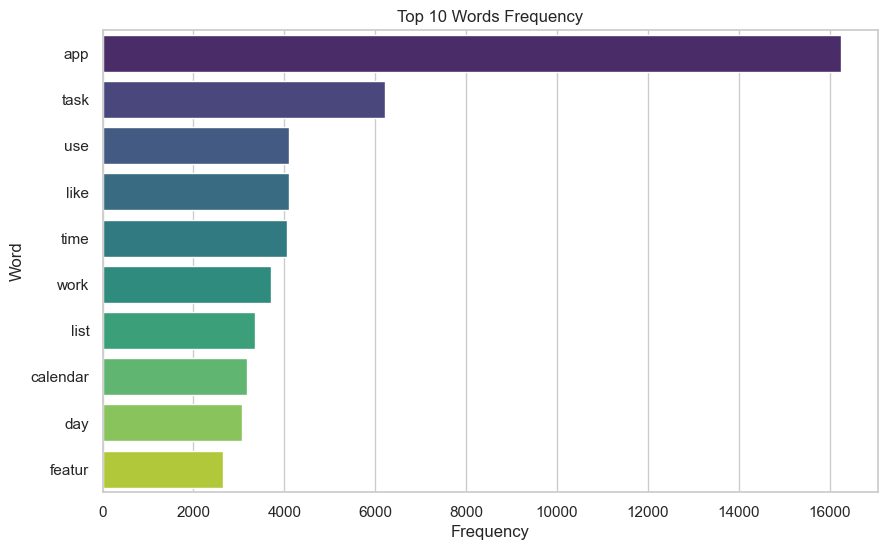

In [47]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(10), palette='viridis')
plt.title('Top 10 Words Frequency')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### In Summary, Data preprocessing, word cloud generation, frequency table creation, and bar graph plotting on text data offer several benefits, including:

#### 1.Standardizing and cleaning data for consistency and accuracy
#### 2.Providing quick insights into key topics or themes present in the text
#### 3.Quantifying word occurrences for detailed analysis of word distribution
#### 4.Visualizing word frequencies for easier comparison and identification of common terms
#### 5.Understanding user sentiment, preferences, and concerns
#### 6.Supporting more advanced text mining and NLP tasks
#### 7.Facilitating data-driven decision-making and product improvements
#### 8.Enhancing communication and collaboration through visual representations of textual data.